Load the datafile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

Import Packages

In [3]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt

Read the file

In [4]:
# Read the data file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sampled_customer_data.csv')

In [5]:
data.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,10713,ND,56,510,no,no,0,164.3,92,27.93,...,19.86,187.3,104,8.43,11.8,1,3.19,2,no,40669525.0
1,1955,KS,137,408,no,no,0,205.9,88,35.00,...,17.79,289.9,84,13.05,14.5,4,3.92,2,no,31764418.0
2,9,MO,138,510,no,no,0,89.1,117,15.15,...,10.78,190.5,71,8.57,9.9,4,2.67,2,no,22612071.0
3,9199,MD,52,415,no,no,0,209.8,114,35.67,...,14.56,154.6,119,6.96,9.9,9,2.67,4,no,69810463.0
4,7404,WV,21,415,no,no,0,91.9,109,15.62,...,16.86,171.7,125,7.73,13.0,7,3.51,2,no,32813594.0


Drop the irrerelavant columns

In [6]:
# Drop the specified columns from the dataset
data = data.drop(['recordID', 'state', 'area_code', 'customer_id'], axis=1)

# Display the first 5 rows of the updated dataset
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,56,no,no,0,164.3,92,27.93,233.7,107,19.86,187.3,104,8.43,11.8,1,3.19,2,no
1,137,no,no,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,no
2,138,no,no,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,no
3,52,no,no,0,209.8,114,35.67,171.3,82,14.56,154.6,119,6.96,9.9,9,2.67,4,no
4,21,no,no,0,91.9,109,15.62,198.4,111,16.86,171.7,125,7.73,13.0,7,3.51,2,no


Visualizations

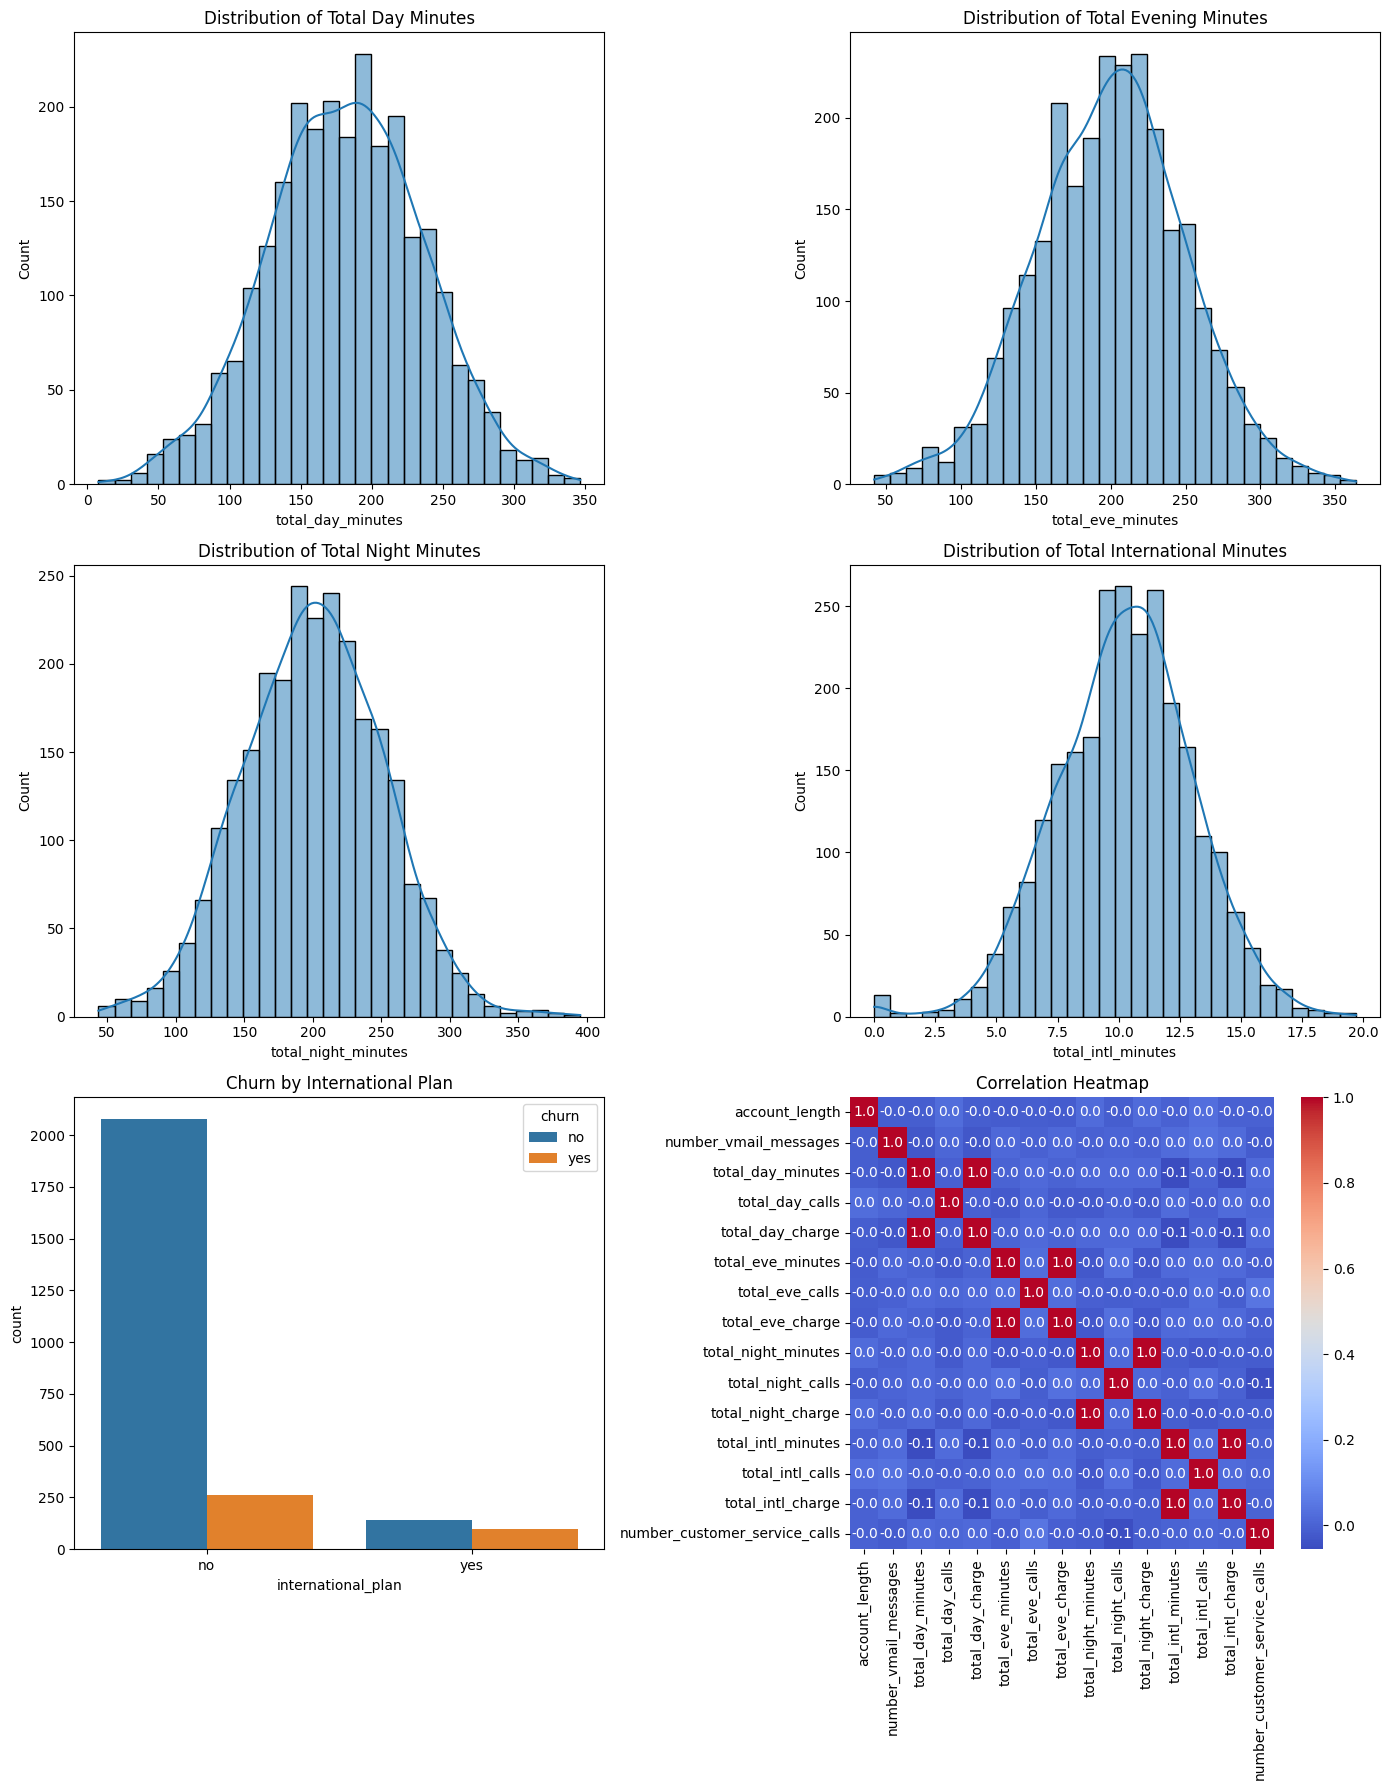

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Histograms for call details
sns.histplot(data['total_day_minutes'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Day Minutes')

sns.histplot(data['total_eve_minutes'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Total Evening Minutes')

sns.histplot(data['total_night_minutes'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Night Minutes')

sns.histplot(data['total_intl_minutes'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total International Minutes')

# Bar chart for churn rates by international plan
sns.countplot(x='international_plan', hue='churn', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Churn by International Plan')

# Correlation heatmap
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", ax=axes[2, 1])
axes[2, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()




Missing Values

In [8]:
# Step 1: Handling Missing Values
# Checking for any missing values in the dataset
missing_data = data.isnull().sum()
missing_data




account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data Type Conversions

In [9]:
# Step 2: Data Type Conversions
# Correcting data types: converting 'yes'/'no' to binary format for 'international_plan' and 'voice_mail_plan'
data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0})
data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0})
# Output the number of missing values per column and the head of the dataframe to see the changes
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,56,0,0,0,164.3,92,27.93,233.7,107,19.86,187.3,104,8.43,11.8,1,3.19,2,no
1,137,0,0,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,no
2,138,0,0,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,no
3,52,0,0,0,209.8,114,35.67,171.3,82,14.56,154.6,119,6.96,9.9,9,2.67,4,no
4,21,0,0,0,91.9,109,15.62,198.4,111,16.86,171.7,125,7.73,13.0,7,3.51,2,no


Checking for outliers using Box plot

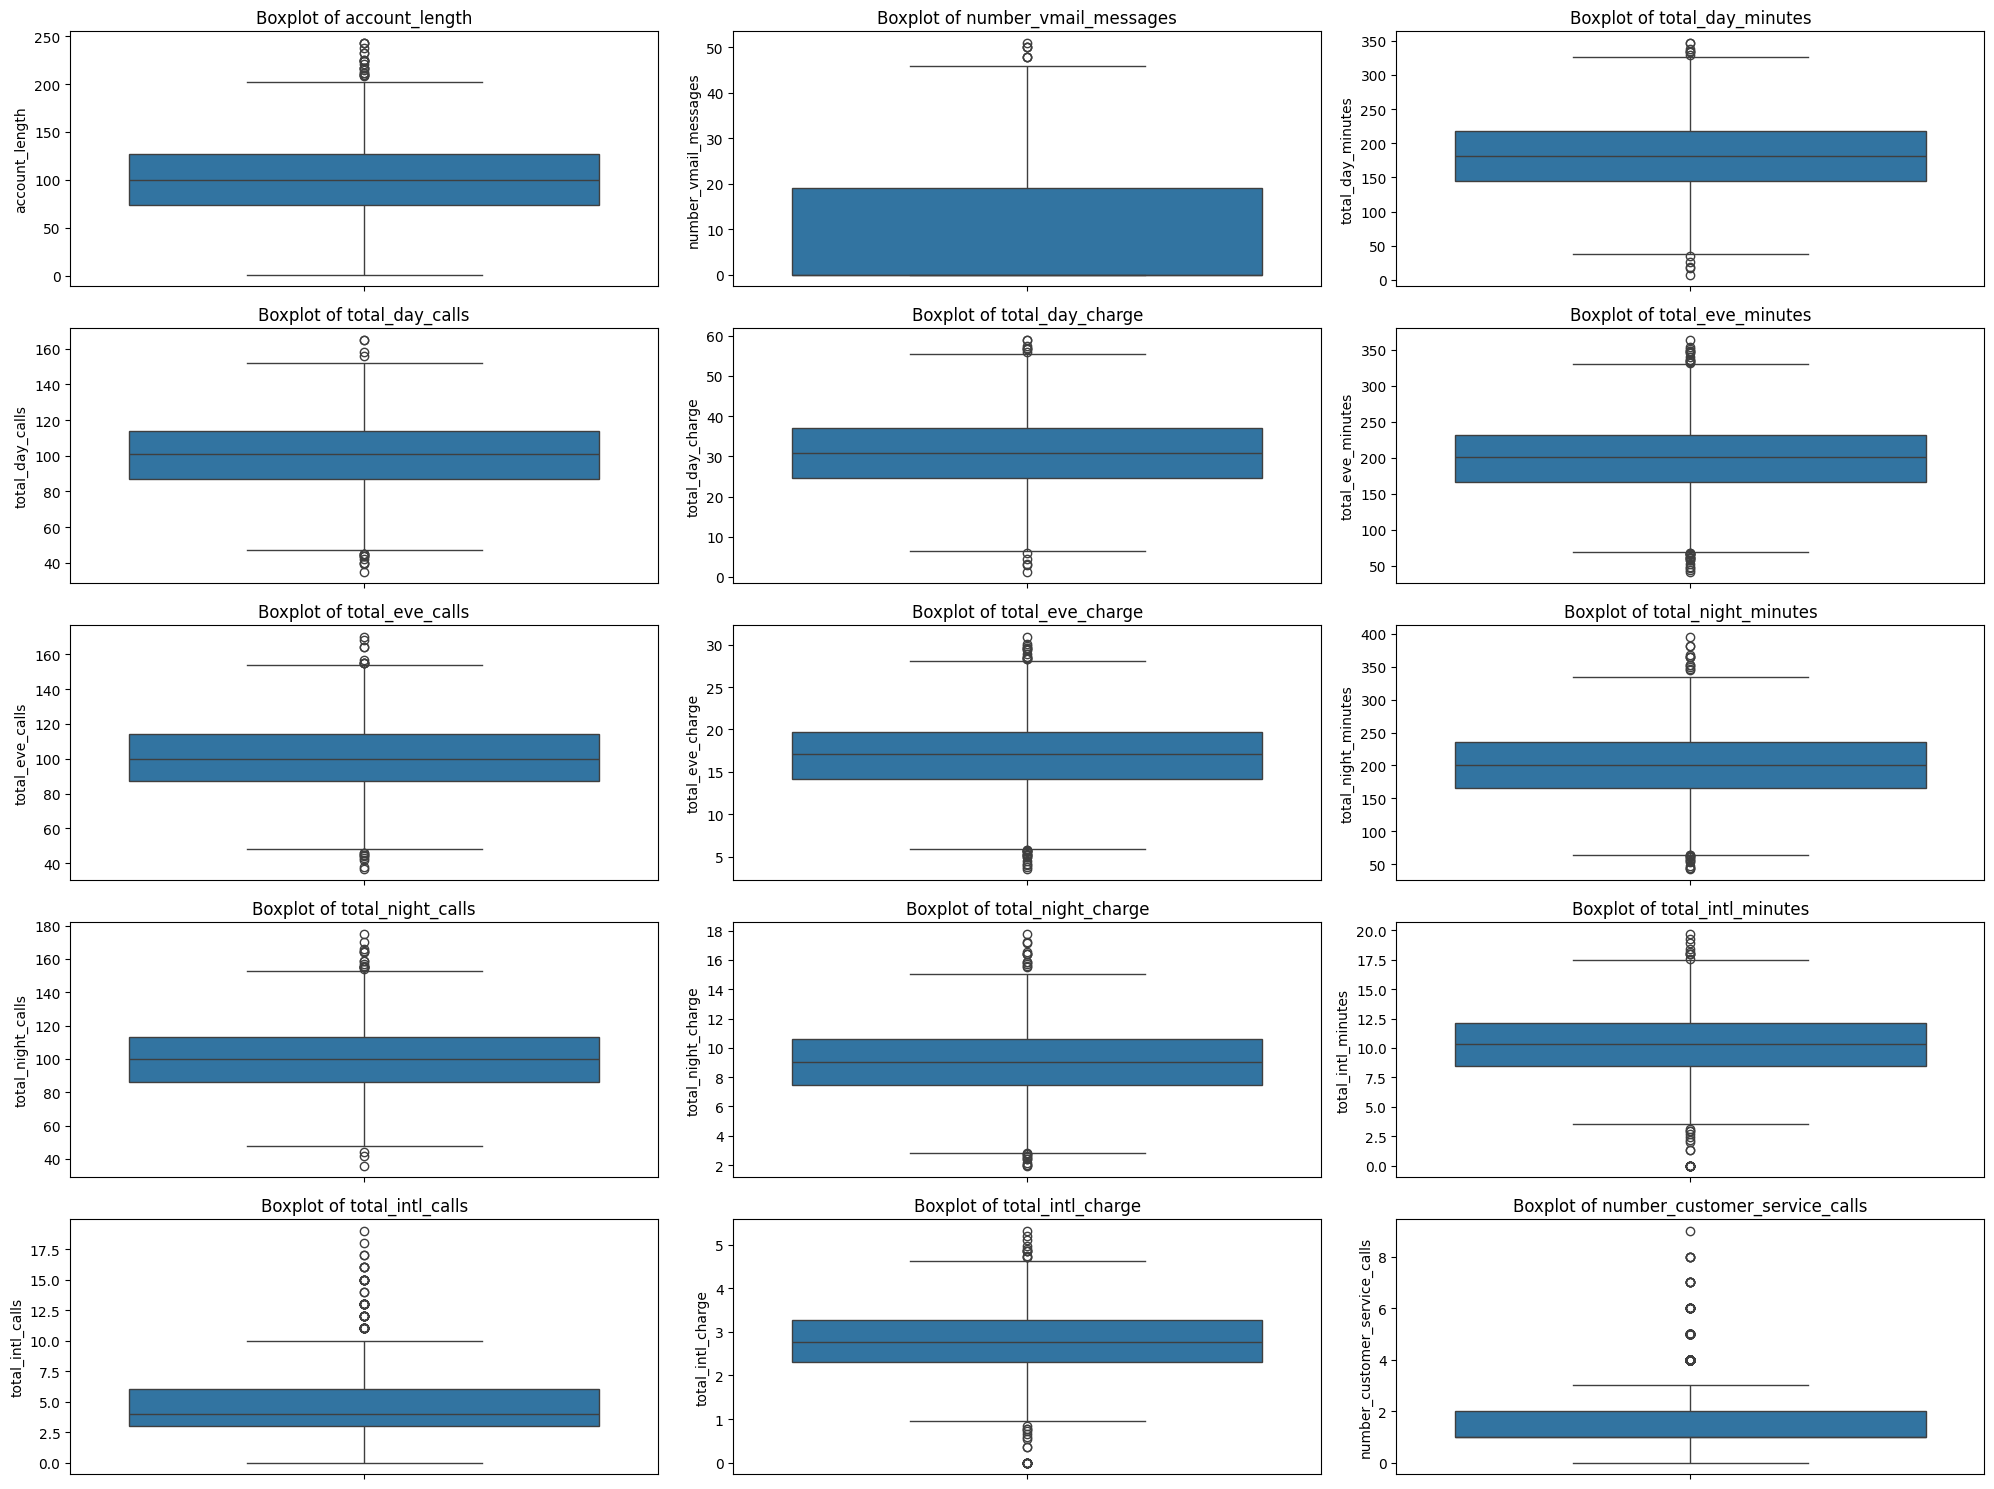

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying outliers using boxplots for key numerical columns
numerical_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
                     'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                     'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                     'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                     'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Plotting boxplots for the numerical variables to identify outliers visually
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Handling outliers - using capping and flooring method

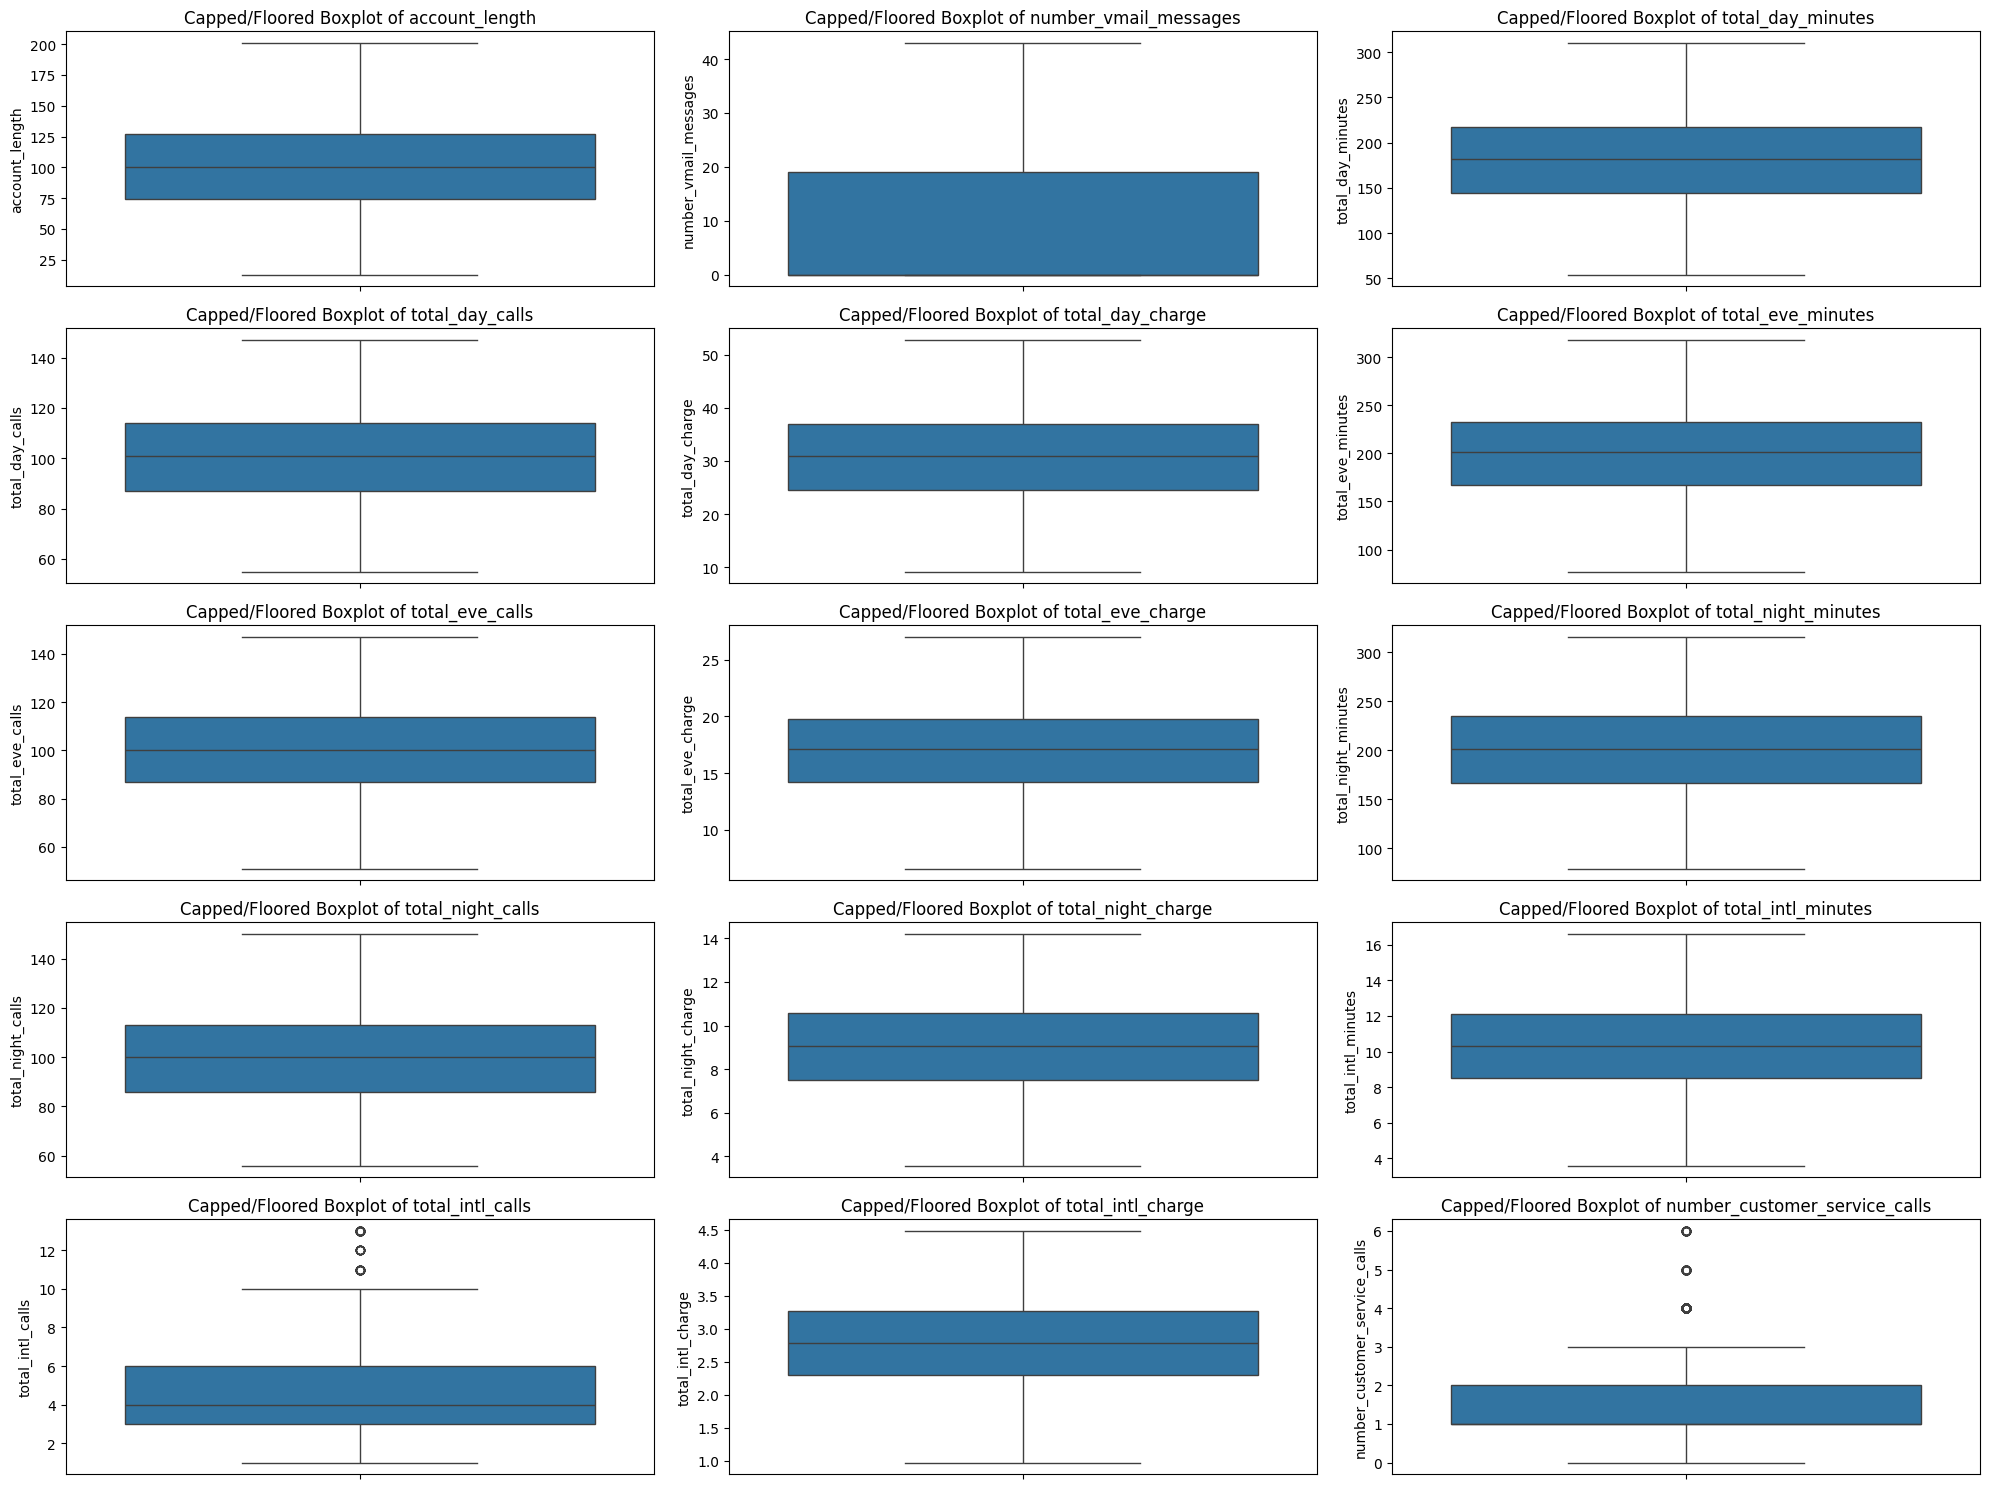

In [11]:
import numpy as np

# Reapplying capping and flooring for each numerical column at the 1st and 99th percentiles
for column in numerical_columns:
    # Calculate the 1st and 99th percentiles
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)

    # Cap and floor the outliers
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# Checking if the capping and flooring has been applied by replotting the boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Capped/Floored Boxplot of {col}')

plt.tight_layout()
plt.show()


Normalization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creating scaler objects
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Selecting numerical columns for scaling (excluding categorical one-hot encoded columns)
numerical_columns = ['international_plan', 'voice_mail_plan']

# Applying Standardization
data_standardized = data.copy()
data_standardized[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Applying Min-Max Scaling
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

# Displaying the first few rows of the standardized and min-max scaled data
data_standardized_head = data_standardized.head()
data_minmax_scaled_head = data_minmax_scaled.head()

data_standardized_head, data_minmax_scaled_head

(   account_length  international_plan  voice_mail_plan  number_vmail_messages  \
 0            56.0           -0.317441        -0.612917                    0.0   
 1           137.0           -0.317441        -0.612917                    0.0   
 2           138.0           -0.317441        -0.612917                    0.0   
 3            52.0           -0.317441        -0.612917                    0.0   
 4            21.0           -0.317441        -0.612917                    0.0   
 
    total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
 0              164.3             92.0             27.93              233.7   
 1              205.9             88.0             35.00              209.3   
 2               89.1            117.0             15.15              126.8   
 3              209.8            114.0             35.67              171.3   
 4               91.9            109.0             15.62              198.4   
 
    total_eve_calls  total_eve

Checking the data balance in churn column

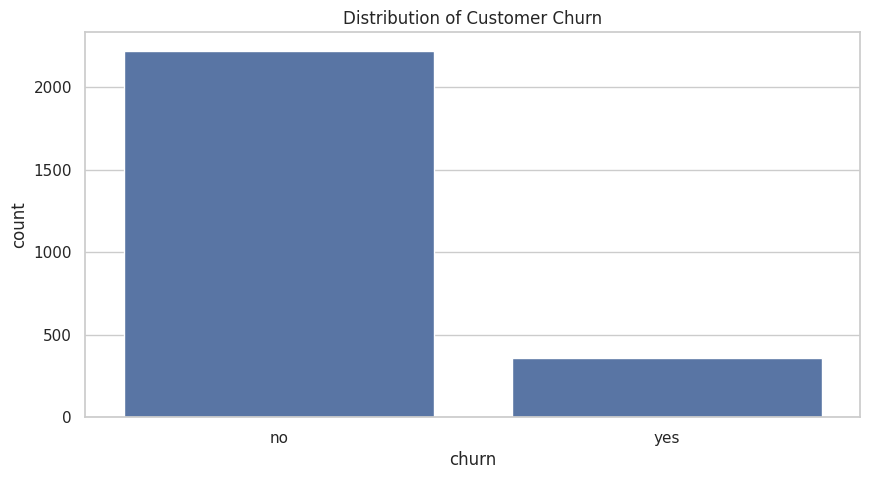

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of customer churn
plt.figure(figsize=(10, 5))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Customer Churn')



plt.show()

Handling Data Imbalance using SMOTE METHOD

In [14]:
from imblearn.over_sampling import SMOTE

# Setting up the feature matrix and target vector
X = data.drop('churn', axis=1)
y = data['churn']

# Encoding categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Initializing SMOTE
smote = SMOTE()

# Resampling the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the new class distribution
new_churn_distribution = pd.Series(y_resampled).value_counts()
new_churn_distribution


churn
no     2220
yes    2220
Name: count, dtype: int64

Visualizations

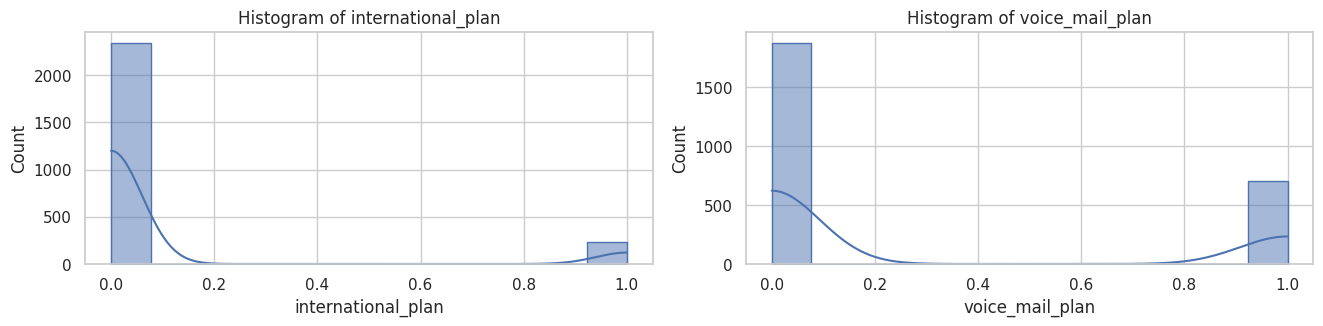

,international_plan,voice_mail_plan
count,2578.000000,2578.000000
mean,0.091544,0.273080
std,0.288437,0.445628
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [15]:
# Generating histograms for numerical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True, element='step')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

# Summary statistics for numerical variables
summary_statistics = data[numerical_columns].describe()

# Displaying summary statistics
summary_statistics


Logistic regression model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare the data
X = data.drop('churn', axis=1)
y = data['churn'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy_logistic)
print(conf_matrix, report)


0.8604651162790697
[[432  15]
 [ 57  12]]               precision    recall  f1-score   support

           0       0.88      0.97      0.92       447
           1       0.44      0.17      0.25        69

    accuracy                           0.86       516
   macro avg       0.66      0.57      0.59       516
weighted avg       0.82      0.86      0.83       516



Hyper parameter tuning for logistic regression model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you've already prepared your feature matrix (X) and target vector (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'saga' supports both l1 and l2 penalty
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='accuracy',  # You can choose other metrics
                           verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with best parameters on the test set
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_scaled)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8632416246346885
Accuracy on Test Set: 0.8662790697674418
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       447
           1       0.50      0.09      0.15        69

    accuracy                           0.87       516
   macro avg       0.69      0.54      0.54       516
weighted avg       0.82      0.87      0.82       516



Ensamble method using Stacking classifier

In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define a meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = stacked_model.predict(X_test_scaled)

# Evaluate the model
accuracy_ensamble = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ensamble)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9670542635658915
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       447
           1       0.93      0.81      0.87        69

    accuracy                           0.97       516
   macro avg       0.95      0.90      0.92       516
weighted avg       0.97      0.97      0.97       516



Random forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)

# Train the model on the scaled training data
random_forest_model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf)
print(conf_matrix_rf)
print(report_rf)


0.9631782945736435
[[442   5]
 [ 14  55]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       447
           1       0.92      0.80      0.85        69

    accuracy                           0.96       516
   macro avg       0.94      0.89      0.92       516
weighted avg       0.96      0.96      0.96       516



Hyper parameter tuning for random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric of choice
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

# Running Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Score: 0.9645971931639201


Gradient Boosting classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume X and y are your feature matrix and target vector, respectively
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred_gbm = gbm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print("Accuracy:", accuracy_gbm)
print("Confusion Matrix:\n", conf_matrix_gbm)
print("Classification Report:\n", report_gbm)


Accuracy: 0.9534883720930233
Confusion Matrix:
 [[441   6]
 [ 18  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       447
           1       0.89      0.74      0.81        69

    accuracy                           0.95       516
   macro avg       0.93      0.86      0.89       516
weighted avg       0.95      0.95      0.95       516



Hyper parameter tuning for Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare your features (X) and target (y)
# X_train, X_test, y_train, y_test = ...

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with best parameters on the test set
best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test_scaled)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9563537399997744
Accuracy on Test Set: 0.9612403100775194
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       447
           1       0.93      0.77      0.84        69

    accuracy                           0.96       516
   macro avg       0.95      0.88      0.91       516
weighted avg       0.96      0.96      0.96       516



Support Vector Classifier Model

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume you've prepared your feature matrix (X) and target vector (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Train the SVM on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", report_svm)


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[440   7]
 [ 36  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       447
           1       0.82      0.48      0.61        69

    accuracy                           0.92       516
   macro avg       0.87      0.73      0.78       516
weighted avg       0.91      0.92      0.91       516



Hyper parameter tuning for Support Vector Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with best parameters on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.925317073445945
Accuracy on Test Set: 0.9341085271317829
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       447
           1       0.82      0.65      0.73        69

    accuracy                           0.93       516
   macro avg       0.88      0.81      0.84       516
weighted avg       0.93      0.93      0.93       516



Neural network Model

Epoch 1/50
52/52 [==============================] - 2s 8ms/step - loss: 0.4511 - accuracy: 0.8308 - val_loss: 0.3993 - val_accuracy: 0.8305
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.8714 - val_loss: 0.3433 - val_accuracy: 0.8378
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.8902 - val_loss: 0.3106 - val_accuracy: 0.8499
Epoch 4/50
52/52 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.8993 - val_loss: 0.2934 - val_accuracy: 0.8692
Epoch 5/50
52/52 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.9109 - val_loss: 0.2860 - val_accuracy: 0.8765
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9206 - val_loss: 0.2863 - val_accuracy: 0.8814
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 0.2035 - accuracy: 0.9297 - val_loss: 0.2692 - val_accuracy: 0.9007
Epoch 8/50
52/52 [==

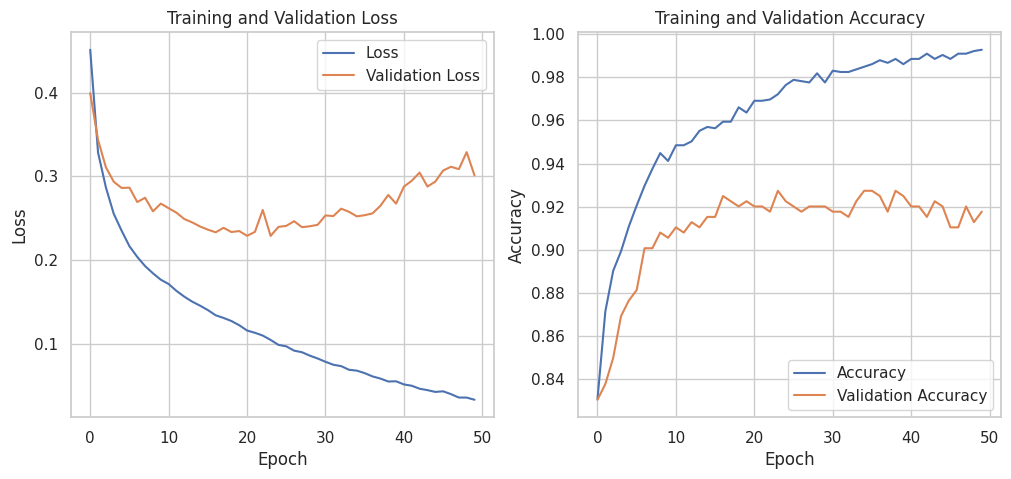

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming you've already prepared your feature matrix (X) and target vector (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy_nn * 100:.2f}%")

# Optionally, plot the training history for loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


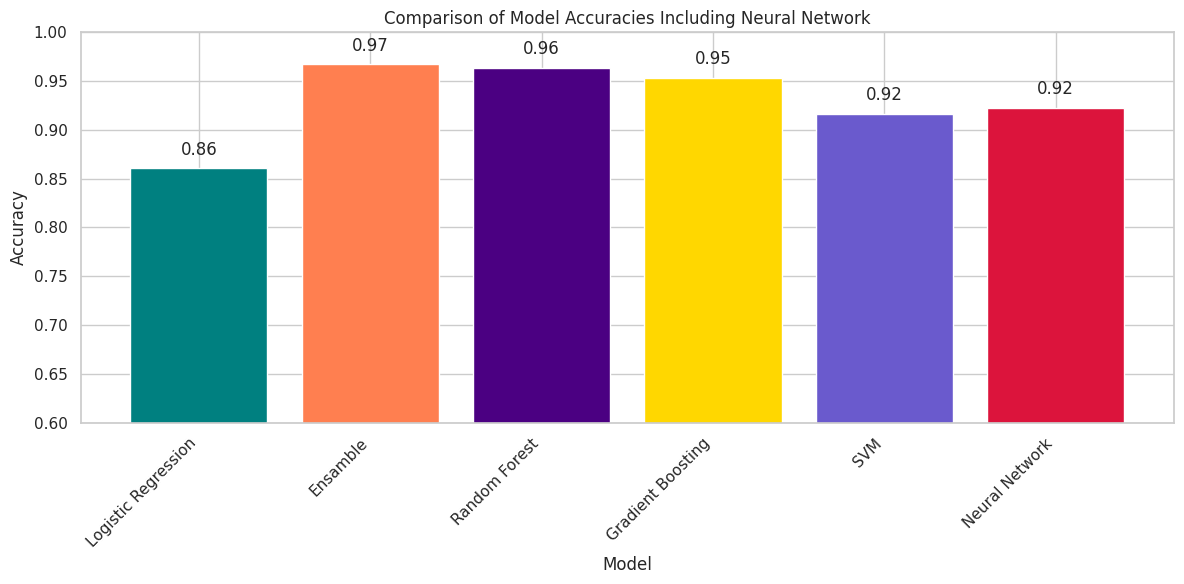

In [40]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Ensamble', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network']

accuracies = [accuracy_logistic, accuracy_ensamble, accuracy_rf, accuracy_gbm, accuracy_svm, test_accuracy_nn]

# Creating the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color=['teal', 'coral', 'indigo', 'gold', 'slateblue', 'crimson'])

# Adding data labels
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Including Neural Network')
plt.ylim(0.6, 1.0)  # Adjust as necessary to fit the range of your actual accuracies
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
